# Иллюстрация алгоритмов обнаружения аномалий

In [7]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
#import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/dash/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


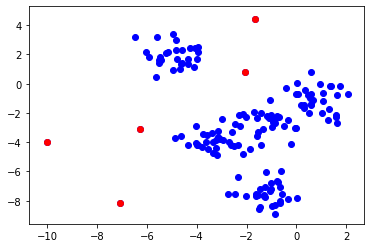

In [12]:
from sklearn.datasets import make_blobs
np.random.seed(1)
n = 150
n_out = 5
X = make_blobs(n_samples=n, n_features=2, centers=5, random_state=2, cluster_std=0.7,center_box=(-8.0, 8.0))[0]
y = np.ones(n)
y[:n_out] = -1
X[:n_out,:] = 20*np.random.rand(n_out, 2) - 10
plt.scatter(X[:,0], X[:,1], c='#0000FF', label='выборка')
plt.scatter(X[:n_out,0], X[:n_out,1], c='#FF0000', label='выбросы')

In [14]:
5/150

0.03333333333333333

In [13]:
from scipy import stats

xx, yy = np.meshgrid(np.linspace(-12, 12, 500), np.linspace(-12, 12, 500))

# для рисования областей
def run_and_plot(clf, X, outliers_fraction, draw_legend=True, title=''):
    clf.fit(X)
    print (clf)
    
    a_prob =  clf.decision_function(X)
    threshold = stats.scoreatpercentile(a_prob, 100 * outliers_fraction)
    
    #print (a_prob)
    
    print ('ошибка  = ' + str( (clf.predict(X) != y).mean()))

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    #print (Z)

    plt.figure(figsize=(3.5, 3.5))
    #plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 20), cmap=plt.cm.binary) # plt.cm.Blues_r cmap=plt.cm.Blues_r)
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 20)) # plt.cm.Blues_r cmap=plt.cm.Blues_r)
    a_ = plt.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='black')
    plt.plot([],[],'--', lw=2, c='black', label='разд. пов-ть')
    #plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='#CCDDFF') # CCDDFF
    a = clf.predict(X)
    b_ = plt.scatter(X[a>0, 0], X[a>0, 1], 50, c='#FF9999', edgecolors='black', linewidth=0.5, label='норм. объекты')
    c_ = plt.scatter(X[a<0, 0], X[a<0, 1], 70, c='#000099', edgecolors='white', linewidth=0.8, label='выбросы')
    plt.axis('tight')
    if draw_legend:
        plt.legend(
            loc=(1,0),
            # prop=matplotlib.font_manager.FontProperties(size=11), [a_.collections[0], b_, c_],
        )
    return a
    #plt.title(title)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale',
            kernel='sigmoid', max_iter=-1, nu=0.04, shrinking=True, tol=0.001,
            verbose=False)
ошибка  = 0.04


array([-1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

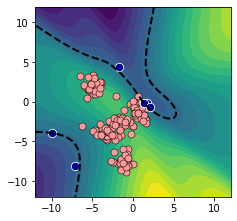

In [33]:
p_out = 0.04

clf = svm.OneClassSVM(nu=p_out, kernel="sigmoid", degree=3) #kernel="rbf", gamma=0.2)

run_and_plot(clf, X, outliers_fraction=p_out,
             draw_legend=False, title='OneClassSVM, kernel="rbf", gamma=0.1')


IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.04,
                max_features=1.0, max_samples=0.5, n_estimators=100,
                n_jobs=None, random_state=1, verbose=0, warm_start=False)
ошибка  = 0.02


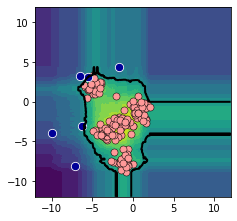

In [35]:
from sklearn.ensemble import IsolationForest

p_out = 0.04

clf = IsolationForest(n_estimators=100,
                      max_samples=0.5,
                      contamination=p_out,
                      max_features=1.0,
                      bootstrap=False,
                      n_jobs=None,
                      random_state=1,
                      verbose=0,
                      warm_start=False)
run_and_plot(clf, X, outliers_fraction=p_out, draw_legend=False,
             title='OneClassSVM, kernel="rbf", gamma=0.1');


EllipticEnvelope(assume_centered=False, contamination=0.04, random_state=None,
                 store_precision=True, support_fraction=None)
ошибка  = 0.07333333333333333


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

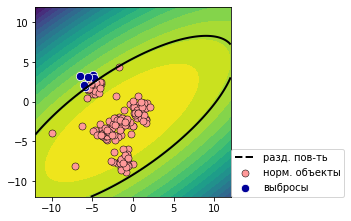

In [30]:
from sklearn.covariance import EllipticEnvelope

p_out = 0.04

clf = EllipticEnvelope(store_precision=True,
                                    assume_centered=False,
                                    support_fraction=None,
                                    contamination=p_out,
                                    random_state=None)

run_and_plot(clf, X, outliers_fraction=p_out, draw_legend=True,
             title='OneClassSVM, kernel="rbf", gamma=0.1')